<a href="https://colab.research.google.com/github/rridss/OIBSIP_taskno/blob/main/Email_spam_detection_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#read csv file and display
df=pd.read_csv('/content/spam.csv',encoding="Latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Data preprocessing
df.isnull().sum()
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=0,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


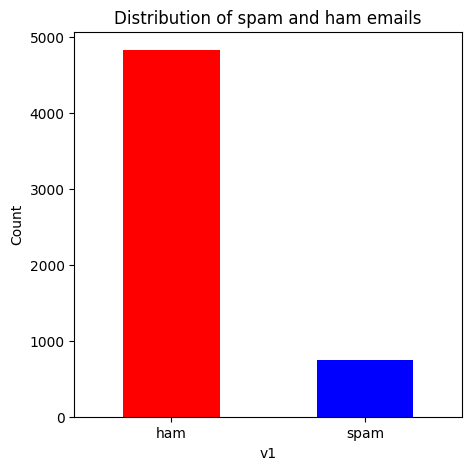

In [ ]:
#data visualization
plt.figure(figsize=(5,5))
df['v1'].value_counts().plot(kind='bar',color=['red','blue'])
plt.title('Distribution of spam and ham emails')
plt.xlabel('v1')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
#split into training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=32)

#stop words removal using tfidfvectorizer
vector =TfidfVectorizer(stop_words='english',lowercase=True)   #converting text data into numerical values using tfidfvectorizer

#Fit and transform training data
X_train_vec = vector.fit_transform(X_train.astype(str))

#Transform the testing data
X_test_vec = vector.transform(X_test.astype(str)) #the tfidfvectorizer takes text as input so .astype(str) is to ensure that datatype is string

#Apply logistic regression classifier
classifier=LogisticRegression()
classifier.fit(X_train_vec, Y_train)

#Make predictions on test set
Y_predict= classifier.predict(X_test_vec)

In [ ]:
#Calculate accuracy of the model
accuracy= accuracy_score(Y_test, Y_predict)
print(f"Accuracy of the model is:{accuracy* 100:.2f}%")

#Confusion matrix
confusion=confusion_matrix(Y_test,Y_predict)
print(f"Confusion Matrix:")
print(confusion)

classification_rep = classification_report(Y_test, Y_predict)
print("Classification Report:")
print(classification_rep)

Accuracy of the model is:96.14%
Confusion Matrix:
[[968   1]
 [ 42 104]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       969
        spam       0.99      0.71      0.83       146

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115

